<img src="../images/ilmudatapy-logo.png" width="350" align="center">
<br>

<center><h1>Simple Linear Regression</h1></center>
<hr>

Di notebook ini, kita akan membuat model <i>machine learning</i> untuk kasus regresi (yang memiliki target berupa nilai kontinue) dengan algoritma __Linear Regression__. Disini kita akan mempraktekkan <b>Simple Linear Regression</b> yang berarti hanya melibatkan satu variabel bebas.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 25px">
    <ul>
        <li>
            Simple Linear Regression
        </li>
        <li>
            Dataset
        </li>
        <li>
            Analisis dan visualisasi data
        </li>
        <li>
            Data Preparation
            <ul>
                <li>Membagi data train dan test</li>
            </ul>
        </li>
        <li>
            Modeling
            <ul>
                <li>Linear regression dengan satu variabel bebas</li>
                <li>Visualisasi linear regression</li>
                <li>Prediksi</li>
                <li>Evaluasi</li>
            </ul>
        </li>
    </ul>
</div>

<hr>
<div class="alert alert-success" style="margin-top: 20px">
    <strong>Catatan:</strong> Untuk menjalankan kode program Python di Jupyter Notebook, klik pada <i>cell</i> yang ingin di-<i>run</i> lalu tekan <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>

<div class="alert alert-danger" style="margin-top: 20px">
    <strong>Warning!:</strong> Jika ada kode program yang <i>error</i> atau output yang dihasilkan tidak sesuai, silahkan <b>Restart & Run All</b> kernel pada bagian menu <b>Kernel</b> di menu bar Jupyter Notebook, atau <b>Restart & Clear Output</b> kernel kemudian jalankan satu per satu <i>cell</i> secara berurutan dari atas ke bawah.
</div>
<hr>

## Simple Linear Regression

__Simple linear regression__ atau regresi linear sederhana merupakan jenis regresi yang paling sederhana karena hanya melibatkan satu variabel bebas atau variabel independen X. Pada dasarnya konsep regresi linear berasal dari persamaan garis :
<br>
<br>
$$
y = \theta_0 + \theta_1  x_1
$$
<br>
<br>
Untuk menghasilkan garis yang tepat dengan dengan error seminimal mungkin, kita harus menentukan nilai $\theta_0$ dan $\theta_1$ yang digunakan sebagai parameter. $\theta_0$ merupakan sebuah intersep (<i>intercept</i>), sedangkan $\theta_1$ merupakan gradien atau kemiringan garis. $\theta_0$ dan $\theta_1$ dapat disebut juga koefisien persamaan linear.

<hr>

## Dataset

Dataset yang akan digunakan pada praktek kali ini adalah dataset diabetes yang sudah disediakan oleh Scikit-Learn. Untuk dapat menggunakannya, kita harus mengimpor <i>package</i> <code>load_diabetes</code> terlebih dahulu dari <code>sklearn.datasets</code>.

Mari kita <i>import</i> <i>library</i> yang dibutuhkan.

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Selanjutnya untuk me-<i>load</i> dataset ke dalam dataframe Pandas, kita dapat langsung menggunakan <code>load_diabetes()</code>. Argumen <code>as_frame = True</code> berfungsi agar kita dapat menggunakan <code>['frame']</code> untuk menampilkan data + target dalam satu dataframe.

    ['data'] ---> menampilkan data fitur
    ['target'] ---> menampilkan target
    ['frame'] ---> menampilkan data + target
    ['DESCR'] ---> menampilkan deskripsi dataset
    ['feature_names'] ---> menampilkan list nama kolom dataset

In [2]:
# load dataset diabetes
data_diabetes = load_diabetes(as_frame=True)

# membuat dataframe
df = pd.DataFrame(data_diabetes['frame'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Kita dapat melihat deskripsi dataset dengan <code>['DESCR']</code>.

In [3]:
# Melihat deskripsi dataset diabetes

print(data_diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<hr>

## Analisis dan visualisasi data

Mari kita lihat <i>scatter plot</i> antara kolom <code>bmi</code> dan <code>target</code>.

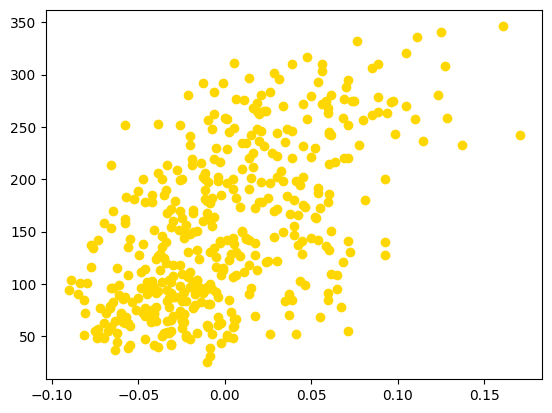

In [4]:
# Scatter plot kolom 'bmi' dan 'target'

plt.scatter(df['bmi'], df['target'], color='gold')
plt.show()

Kita juga dapat mengikutsertakan kolom <code>bp</code> dalam plot sebagai warnanya.

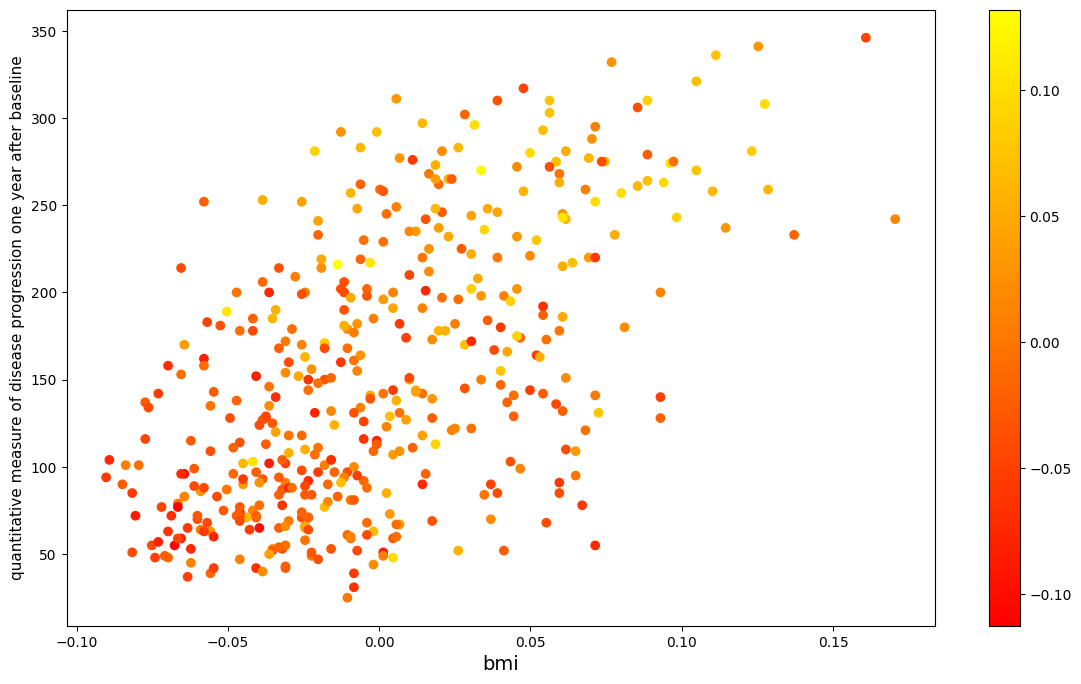

In [5]:
# Mengatur warna scatter plot dengan color map

fig, ax = plt.subplots(figsize=(14,8))
x = ax.scatter(df['bmi'], df['target'], c=df['bp'], cmap='autumn')

ax.set_xlabel('bmi', size=14)
ax.set_ylabel('quantitative measure of disease progression one year after baseline', size=11)

# Menambakan color bar
fig.colorbar(x)

plt.show()

Sekarang mari kita lihat korelasi antarkolom dengan <i>heatmap</i>.

<Axes: >

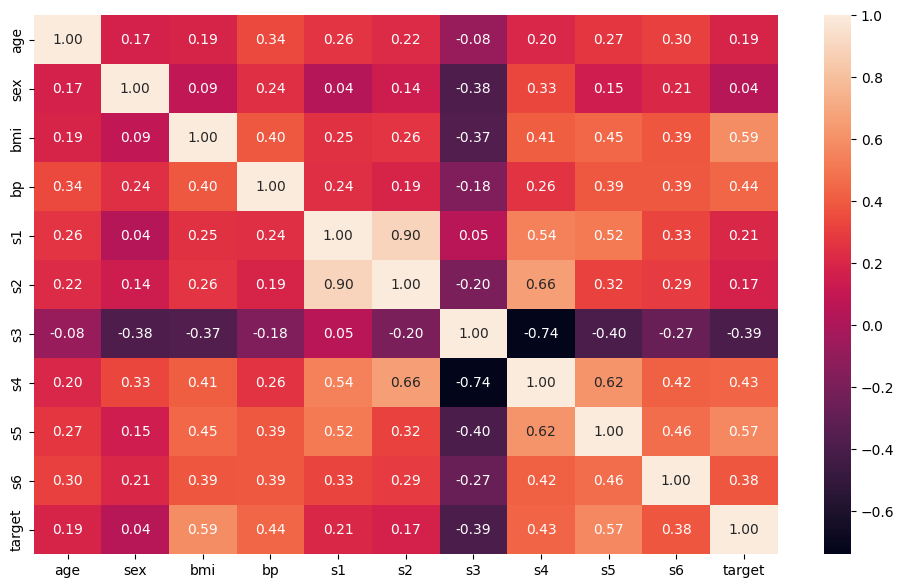

In [6]:
# Menampilkan korelasi antarkolom

plt.figure(figsize=(12,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

<hr>

## Data Preparation

### Membagi data train dan test

Dataset yang sudah disediakan Scikit-Learn ini, datanya sudah dalam bentuk yang dinormalisasi sehingga kita di bagian <i>data preparation</i>, kita hanya perlu membagi data menjadi data <i>train</i> dan <i>test</i>.

In [7]:
# Membagi data train dan test

np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]

Selanjutnya kita definisikan <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, dan <code>y_test</code>.

Yang akan kita praktekkan sekarang adalah <i>simple linear regression</i> sehingga kita hanya menggunakan satu fitur. Disini kita akan ambil fitur <code>bmi</code>.

In [8]:
# Mendefinisikan X_train, y_train, X_test, dan y_test

X_train = np.asanyarray(train[['bmi']])
y_train = np.asanyarray(train[['target']])

X_test = np.asanyarray(test[['bmi']])
y_test = np.asanyarray(test[['target']])

<hr>

## Modeling

### Linear regression dengan satu variabel bebas

Pemodelan <i>machine learning</i> untuk kasus regresi yang paling sederhana dapat menggunakan <code>LinearRegression()</code>.

Mari kita membuat model <i>linear regression</i> dan melatihnya dengan <code>.fit()</code>.

In [9]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Kita dapat menampilkan <i>coefficient</i> dengan atribut <code>coef_</code> dan <i>intercept</i> dengan atribut <code>intercept_</code>.

In [10]:
# Coefficient dan Intercept
print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ', lr_model.intercept_)

Coefficients:  [[958.28967126]]
Intercept:  [152.46395235]


### Visualisasi linear regression

Sekarang mari kita visualisasikan <i>linear regression</i> dengan <i>scatter plot</i>.

Text(0, 0.5, 'target')

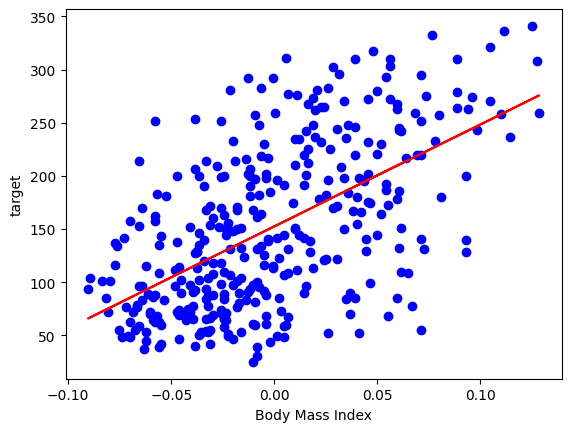

In [11]:
# Visualisasi dengan scatter plot

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, lr_model.coef_[0][0]*X_train + lr_model.intercept_[0], '-r')
plt.xlabel('Body Mass Index')
plt.ylabel('target')

### Prediksi

Mari kita menguji model dengan menggunakan data <code>X_test</code>.

In [12]:
# Menguji model dengan X_test

y_pred = lr_model.predict(X_test)

print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi: \n', y_pred[0:10])

Data asli: 
 [[ 75.]
 [ 63.]
 [ 69.]
 [179.]
 [ 87.]
 [ 65.]
 [102.]
 [ 92.]
 [155.]
 [ 59.]]


Hasil prediksi: 
 [[103.13689113]
 [150.64827531]
 [169.23968652]
 [124.82687086]
 [104.1697473 ]
 [ 91.77547317]
 [122.76115851]
 [129.99115175]
 [145.48399442]
 [143.41828207]]


### Evaluasi

Selanjutnya evaluasi kinerja model dengan <code>mean_absolute_error</code> dan <code>mean_squared_error</code>.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 51.84
Mean Squared Error (MSE): 3694.70


<hr>

Copyright © <a href="https://ilmudatapy.com/">ilmudatapy.com</a>